In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from network import *
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

In [14]:
def round_func(x):
    return (int(100*x)//5)/20.0

In [15]:
people = 1000
connexions = 100000
alpha = 10
steps = 10000
mu=0.2

In [16]:
li_mu = [0.05,0.1,0.2,0.4,0.6,0.8,1]
li_df = []
for mu in li_mu:

    net = Network(people,connexions,alpha, mu)
    net.simulate(steps)
    memes_df = pd.DataFrame({'quality': [meme.quality for meme in net.memes],
                                 'views': [meme.views for meme in net.memes],
                                 'shares': [meme.shares for meme in net.memes],
                                 'start': [meme.start for meme in net.memes],
                                 'end': [meme.end for meme in net.memes]})
    memes_df['lifetime'] = memes_df['end'] - memes_df['start']

    finished_memes = memes_df.dropna(axis=1)
    finished_memes['rounded_quality'] = finished_memes['quality'].apply(round_func)

    df_plot = finished_memes.groupby('rounded_quality').mean()[['shares']]
    df_plot.columns=[mu]
    li_df.append(df_plot)

df_result = pd.concat(li_df, axis=1)
df_result

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,0.05,0.1,0.2,0.4,0.6,0.8,1.0
rounded_quality,,,,,,,
0.00,1.205882,1.025000,1.073684,1.045685,1.027778,1.009709,1.0
0.05,1.153846,1.318182,1.130435,1.112360,1.074576,1.035443,1.0
0.10,1.440000,1.392157,1.250000,1.147465,1.106796,1.063725,1.0
0.15,1.793103,1.490196,1.439252,1.238095,1.170909,1.081081,1.0
0.20,1.692308,1.956522,1.571429,1.221675,1.176271,1.122010,1.0
0.25,1.702703,1.782609,1.978495,1.437811,1.269360,1.152882,1.0
0.30,2.428571,2.172414,2.019048,1.680498,1.366559,1.133995,1.0
0.35,3.076923,2.283019,2.356322,1.720588,1.339806,1.166247,1.0
0.40,5.357143,4.093023,2.906977,1.771144,1.453642,1.166213,1.0


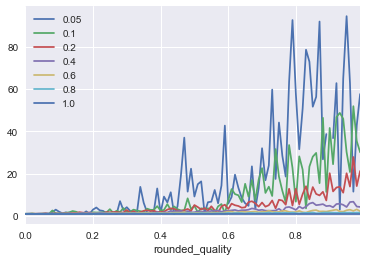

In [13]:
df_result.plot()

## popularity as a function of alpha

In [7]:
people = 1000
connexions = 100000
steps = 10000
mu=0.1

In [8]:
li_alpha = [2,4,8,16,32,50]
li_df = []
for alpha in li_alpha:

    net = Network(people,connexions,alpha, mu)
    net.simulate(steps)
    memes_df = pd.DataFrame({'quality': [meme.quality for meme in net.memes],
                                 'views': [meme.views for meme in net.memes],
                                 'shares': [meme.shares for meme in net.memes],
                                 'start': [meme.start for meme in net.memes],
                                 'end': [meme.end for meme in net.memes]})
    memes_df['lifetime'] = memes_df['end'] - memes_df['start']

    finished_memes = memes_df.dropna(axis=1)
    finished_memes['rounded_quality'] = finished_memes['quality'].apply(round_func)

    df_plot = finished_memes.groupby('rounded_quality').mean()[['shares']]
    df_plot.columns=[alpha]
    li_df.append(df_plot)

df_result = pd.concat(li_df, axis=1)
df_result

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,2,4,8,16,32,50
rounded_quality,,,,,,
0.00,1.060000,1.125000,1.095238,1.083333,1.108696,1.152174
0.05,1.272727,1.204082,1.076923,1.100000,1.323077,1.102564
0.10,1.868852,1.233333,1.264151,1.115385,1.297872,1.400000
0.15,1.962264,1.295455,1.184211,1.690909,1.909091,1.490196
0.20,1.734694,1.882353,1.796296,1.822222,1.729167,1.870370
0.25,3.078431,2.285714,2.086957,2.000000,2.317073,1.849057
0.30,3.181818,2.647059,1.795455,2.370370,2.414634,2.511628
0.35,4.441176,3.469388,2.771930,2.316667,4.145455,3.526316
0.40,5.020000,2.700000,4.245283,3.542857,2.862069,3.952381


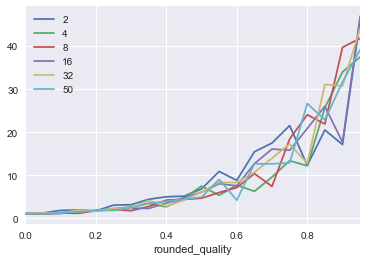

In [9]:
df_result.plot()

In [10]:
sb.factorplot(x='rounded_quality',
               data=df_result);

ValueError: Could not interpret input 'rounded_quality'